## FinMark Corporation
### Wagas, Jemelie B.

### Product Offering Data

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Product_Offering_Data.csv') 
df.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium


In [2]:
# Check if there are null values
df.isna().all()

Product_ID             False
Product_Name           False
Product_Type           False
Risk_Level             False
Target_Age_Group        True
Target_Income_Group    False
dtype: bool

In [42]:
# Quick check for the content of Product Name column but can also use .duplicated()==1 syntax to identify duplicate values 
df = pd.read_csv('Product_Offering_Data.csv') 
df['Product_Name']

0              Platinum Credit Card
1              Gold Savings Account
2     High-Yield Investment Account
3                     Mortgage Loan
4                         Auto Loan
5                     Personal Loan
6             Youth Savings Account
7        Retirement Investment Fund
8                     Business Loan
9                Travel Credit Card
10             Gold Savings Account
11               Travel Credit Card
12    High-Yield Investment Account
13                    Personal Loan
14             Platinum Credit Card
Name: Product_Name, dtype: object

In [41]:
# Remove the duplicates from the Product Name column
df = pd.read_csv('Product_Offering_Data.csv') 
df = df.drop_duplicates()
df['Product_Name']

0             Platinum Credit Card
1             Gold Savings Account
2    High-Yield Investment Account
3                    Mortgage Loan
4                        Auto Loan
5                    Personal Loan
6            Youth Savings Account
7       Retirement Investment Fund
8                    Business Loan
9               Travel Credit Card
Name: Product_Name, dtype: object

In [47]:
# Check data types
df = pd.read_csv('Product_Offering_Data.csv')
df.dtypes

Product_ID               int64
Product_Name            object
Product_Type            object
Risk_Level              object
Target_Age_Group       float64
Target_Income_Group     object
dtype: object

##### ------DONE--------

### Transaction Data

In [1]:
import pandas as pd

#Load the CSV file into a DataFrame
df = pd.read_csv('Transaction_Data.csv') 
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


In [2]:
# Check null values
df[df['Transaction_Amount'].isna()==1]

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
31,32,63,2023-01-02 07:00:00,NaN,Purchase
212,213,411,2023-01-09 20:00:00,NaN,Purchase
253,254,979,2023-01-11 13:00:00,NaN,Bill Payment
272,273,253,2023-01-12 08:00:00,NaN,Purchase
...,...,...,...,...,...
4691,4692,567,2023-07-15 11:00:00,NaN,Purchase
4846,4847,366,2023-07-21 22:00:00,NaN,Investment
4862,4863,460,2023-07-22 14:00:00,NaN,Investment
4876,4877,917,2023-07-23 04:00:00,NaN,Investment


In [115]:
# Fill those with null values as 0
df = pd.read_csv('Transaction_Data.csv')
df = df.dropna(subset=['Transaction_Amount'])
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment
5,6,348,2023-01-01 05:00:00,3824.0,Loan Payment


In [70]:
import pandas as pd

df = pd.read_csv('Transaction_Data.csv')
df = pd.DataFrame(data)

# Get summary statistics
print(df.describe())

              0
count  7.000000
mean   5.000000
std    3.109126
min    1.000000
25%    2.500000
50%    5.000000
75%    7.500000
max    9.000000


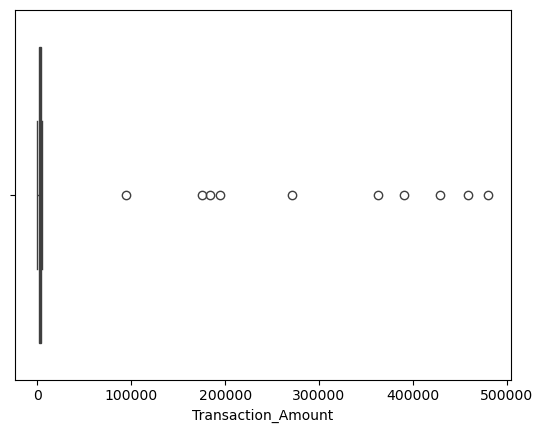

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Transaction_Data.csv')
# Boxplot
sns.boxplot(x=df['Transaction_Amount'])
plt.show()

In [65]:
import pandas as pd

df = pd.read_csv('Transaction_Data.csv') 
data_series = pd.Series(data) # Create a pandas Series
data_range = data_series.max() - data_series.min() # Calculate the range
print("Range:", data_range)

Range: 8


In [66]:
# Calculate the variance (by default, uses n-1 for degrees of freedom)
variance = data_series.var()
print("Variance:", variance)

Variance: 9.666666666666666


In [67]:
# Calculate standard deviation
standard_deviation = data_series.std()
print("Standard Deviation:", standard_deviation)

Standard Deviation: 3.1091263510296048


In [68]:
# IQR requires calculating quartiles first
quartiles = data_series.quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print("Interquartile Range:", iqr)

Interquartile Range: 5.0


In [91]:
import pandas as pd
import numpy as np

# Function to calculate Z-scores and detect outliers
def detect_outliers_zscore(df, numerical_columns, threshold=3):

    # Calculate Z-scores for specified numerical columns
    z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
    
    # Add Z-scores to the DataFrame
    for col in numerical_columns:
        df[f'{col}_Z-Score'] = z_scores[col]
    
    # Identify outliers (absolute Z-score > threshold)
    outliers = df[(np.abs(z_scores) > threshold).any(axis=1)]
    
    return outliers

# Load your data from a CSV file
file_path = 'Transaction_Data.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Specify the numerical columns to analyze
numerical_columns = ['Transaction_ID', 'Transaction_Amount']  # Include both columns

# Detect outliers
outliers = detect_outliers_zscore(df, numerical_columns, threshold=3)

# Print results
print("Original DataFrame:")
print(df.head())  # Display the first few rows of the original data
print("\nOutliers detected using Z-Score method:")
print(outliers)

# Save outliers to a new CSV file (optional)
outliers.to_csv('Outliers_Transaction_Data.csv', index=False)
print("\nOutliers saved to 'Outliers_Transaction_Data.csv'.")

Original DataFrame:
   Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0               1          393  2023-01-01 00:00:00              3472.0   
1               2          826  2023-01-01 01:00:00                 NaN   
2               3          916  2023-01-01 02:00:00                10.0   
3               4          109  2023-01-01 03:00:00                72.0   
4               5          889  2023-01-01 04:00:00              1793.0   

  Transaction_Type  Transaction_ID_Z-Score  Transaction_Amount_Z-Score  
0         Purchase               -1.730994                    0.025460  
1     Bill Payment               -1.730301                         NaN  
2         Purchase               -1.729608                   -0.208167  
3       Investment               -1.728915                   -0.203983  
4       Investment               -1.728222                   -0.087845  

Outliers detected using Z-Score method:
      Transaction_ID  Customer_ID     Transaction_

In [93]:
df = df[(df['Transaction_Amount_Z-Score'] <= 3) & (df['Transaction_Amount_Z-Score'] >= -3)]

In [4]:
# Quick check for the content of Transaction Type column 
df['Transaction_Type'].unique()

array(['Purchase', 'Bill Payment', 'Investment', 'Loan Payment'],
      dtype=object)

In [5]:
# Check data types
df.dtypes

Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object

In [6]:
df['Customer_ID'] = df['Customer_ID'].astype('str')

In [8]:
# Check data types
df.dtypes

Transaction_ID          int64
Customer_ID            object
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object

In [128]:
import pandas as pd
import numpy as np

df = pd.read_csv('Transaction_Data.csv')

# Values to drop (outliers)
values_to_drop = [480300, 458600, 428900, 390200, 362700, 270900, 194500, 183500, 175600, 94500]

# Drop rows where satisfaction_score is blank (NaN) or in values_to_drop
df = df[~df['Transaction_Amount'].isin(values_to_drop) & ~df['Transaction_Amount'].isna()]

# Save the updated table to a new CSV file
df.to_csv('Transaction_Data_new.csv', index=False)

print(df)

      Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0                  1          393  2023-01-01 00:00:00              3472.0   
2                  3          916  2023-01-01 02:00:00                10.0   
3                  4          109  2023-01-01 03:00:00                72.0   
4                  5          889  2023-01-01 04:00:00              1793.0   
5                  6          348  2023-01-01 05:00:00              3824.0   
...              ...          ...                  ...                 ...   
5045            3034          317  2023-05-07 09:00:00              3018.0   
5046             583          336  2023-01-25 06:00:00              2670.0   
5047            1211          550  2023-02-20 10:00:00              3252.0   
5048            2259          258  2023-04-05 02:00:00              3442.0   
5049            1159          271  2023-02-18 06:00:00               108.0   

     Transaction_Type  
0            Purchase  
2            Pu

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Transaction_Data_new.csv')

# Define the bins and labels
bins = [10, 999, 2999, 4999]  # Ranges: (10-999), (1000-2999), (3000-4999)
labels = ['Low', 'Medium', 'High']

df['target_income_group'] = pd.cut(
    df['Transaction_Amount'],
    bins=bins,
    labels=labels,
    right=True,  # Include the right edge of the bin
    include_lowest=True  # Include the lowest value (10)
)
df.to_csv('Transaction_Data_new.csv', index=False)
print(df)

      Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0                  1          393  2023-01-01 00:00:00              3472.0   
1                  3          916  2023-01-01 02:00:00                10.0   
2                  4          109  2023-01-01 03:00:00                72.0   
3                  5          889  2023-01-01 04:00:00              1793.0   
4                  6          348  2023-01-01 05:00:00              3824.0   
...              ...          ...                  ...                 ...   
4935            3034          317  2023-05-07 09:00:00              3018.0   
4936             583          336  2023-01-25 06:00:00              2670.0   
4937            1211          550  2023-02-20 10:00:00              3252.0   
4938            2259          258  2023-04-05 02:00:00              3442.0   
4939            1159          271  2023-02-18 06:00:00               108.0   

     Transaction_Type target_income_group  
0            Purcha

In [197]:
df = pd.read_csv('Transaction_Data_new.csv') 
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,target_income_group
0,1,393,2023-01-01 00:00:00,3472.0,Purchase,High
1,3,916,2023-01-01 02:00:00,10.0,Purchase,Low
2,4,109,2023-01-01 03:00:00,72.0,Investment,Low
3,5,889,2023-01-01 04:00:00,1793.0,Investment,Medium
4,6,348,2023-01-01 05:00:00,3824.0,Loan Payment,High


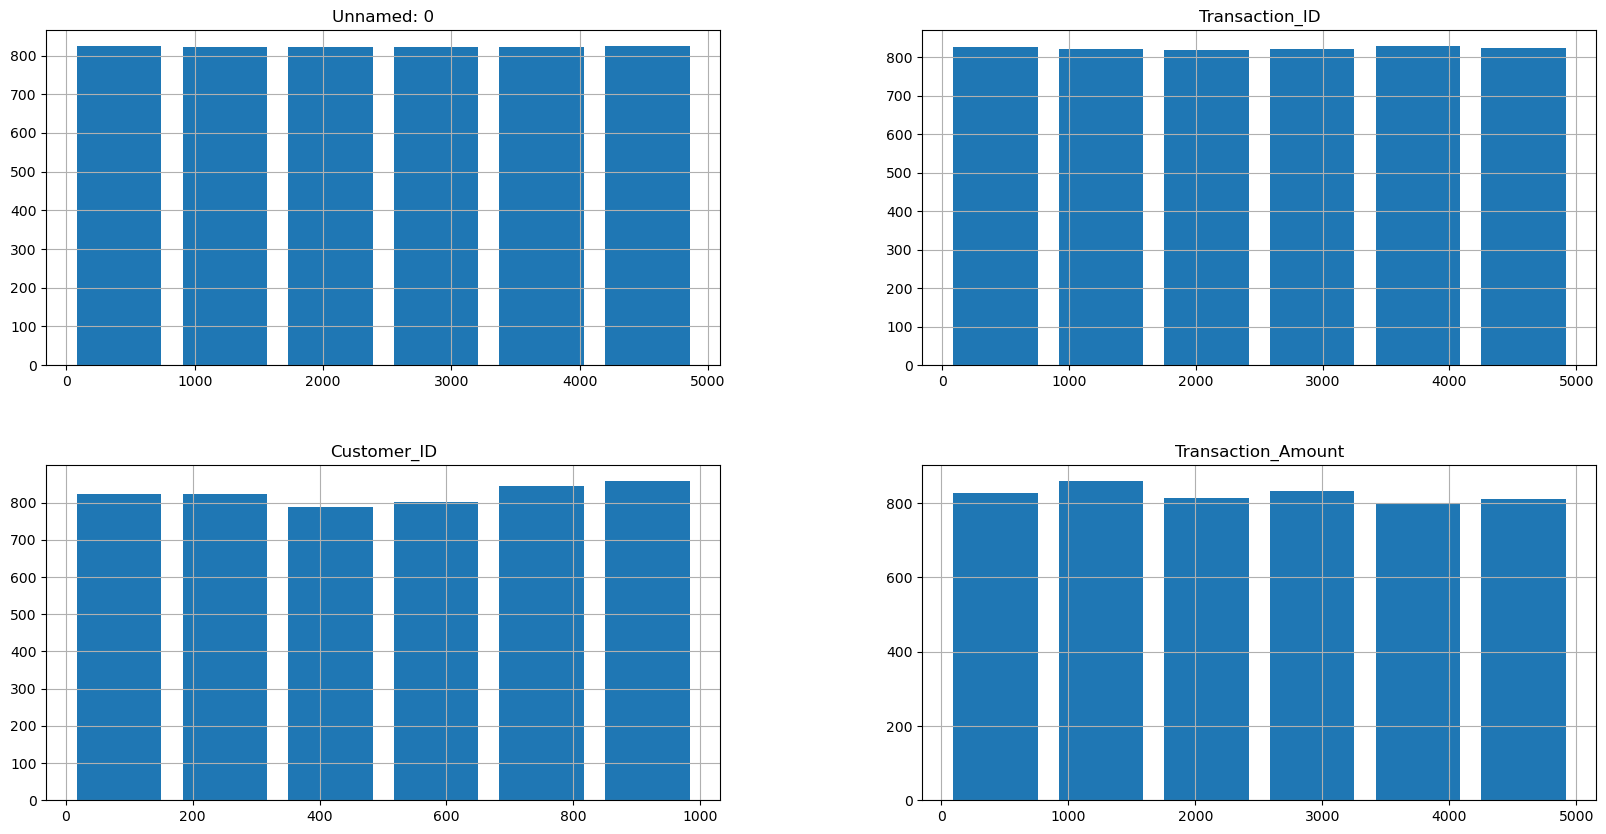

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Transaction_Data_new1.csv')

# Histogram
##sns.histplot(df['Transaction_Amount'], kde=True, bins=4)
df.hist(bins=6, figsize=(20,10), rwidth=0.8)
plt.show()

In [201]:
import pandas as pd
df = pd.read_csv('Transaction_Data_new.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,4940.0,2500.811336,1443.977748,1.0,1250.75,2503.5,3750.25,5000.0
Customer_ID,4940.0,504.403846,291.694641,1.0,250.75,508.0,764.00,1000.0
Transaction_Amount,4940.0,2485.667206,1437.583246,10.0,1235.75,2476.0,3695.75,4999.0


In [99]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
df = pd.read_csv('Transaction_Data_new1.csv')

one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
one_hottransform = one_hot.fit_transform(df[['Transaction_Type']])
print(one_hot)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)


In [127]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.read_csv('Transaction_Data_new1.csv')
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encoded_data = encoder.fit_transform(df[['Transaction_Type']])
df = pd.concat([df, encoded_data], axis=1).drop(columns = ['Transaction_Type'])
df.to_csv('Transaction_Data_new1.csv', index=False)

In [129]:
df = pd.read_csv('Transaction_Data_new1.csv')
df.head(10)

,Unnamed: 0,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,target_income_group,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Loan Payment,Transaction_Type_Purchase
0,0,1,393,2023-01-01 00:00:00,3472.0,High,0.0,0.0,0.0,1.0
1,1,3,916,2023-01-01 02:00:00,10.0,Low,0.0,0.0,0.0,1.0
2,2,4,109,2023-01-01 03:00:00,72.0,Low,0.0,1.0,0.0,0.0
3,3,5,889,2023-01-01 04:00:00,1793.0,Medium,0.0,1.0,0.0,0.0
4,4,6,348,2023-01-01 05:00:00,3824.0,High,0.0,0.0,1.0,0.0
5,5,7,50,2023-01-01 06:00:00,235.0,Low,0.0,0.0,1.0,0.0
6,6,8,916,2023-01-01 07:00:00,1052.0,Medium,0.0,0.0,1.0,0.0
7,7,9,105,2023-01-01 08:00:00,854.0,Low,0.0,0.0,0.0,1.0
8,8,10,420,2023-01-01 09:00:00,2690.0,Medium,0.0,1.0,0.0,0.0
9,9,11,373,2023-01-01 10:00:00,4129.0,High,0.0,1.0,0.0,0.0


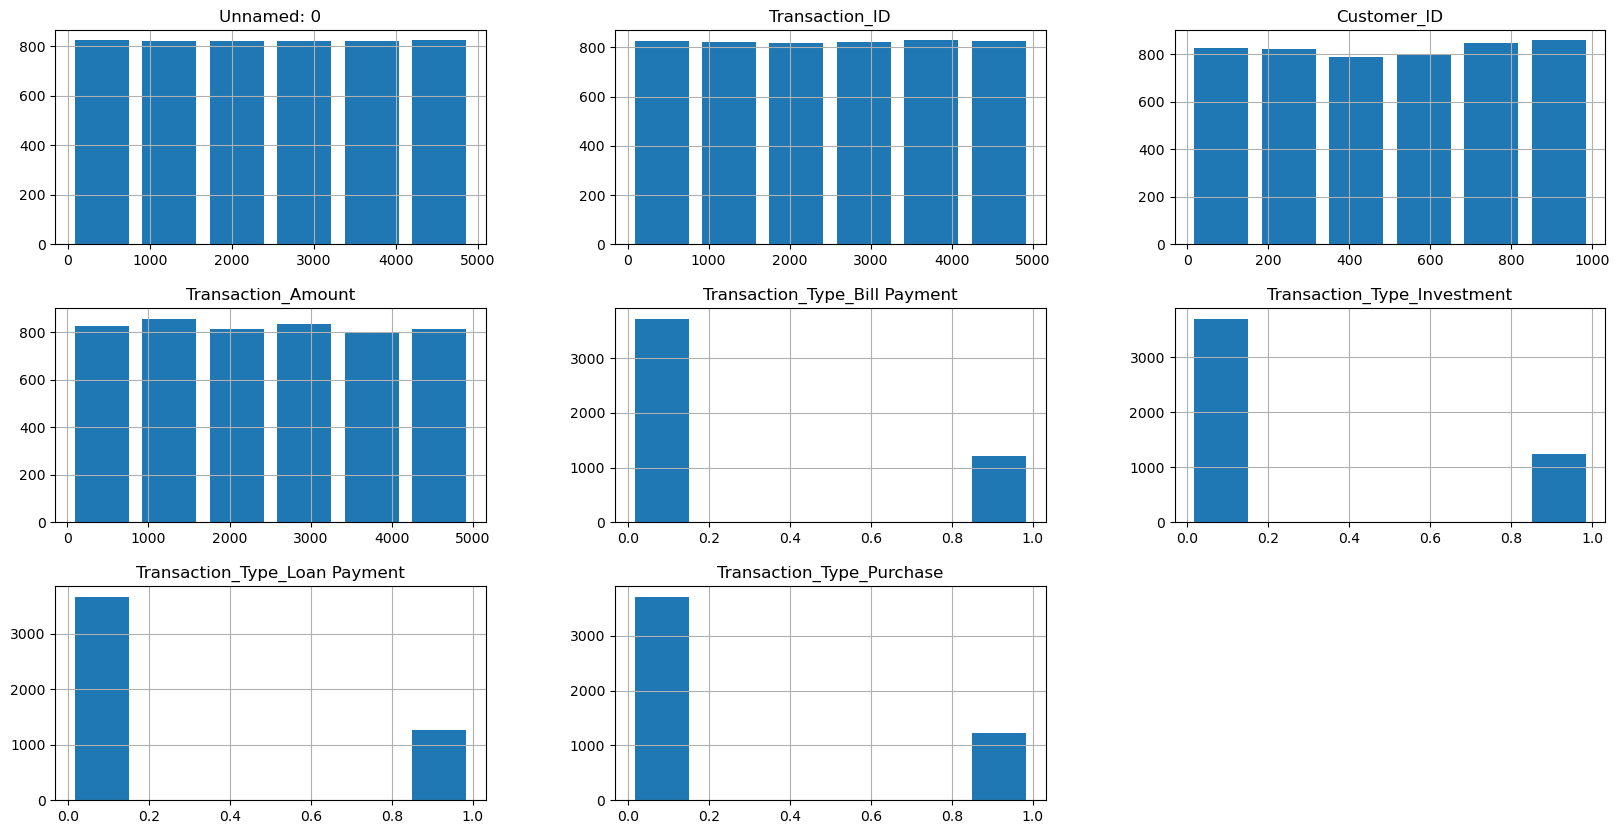

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Transaction_Data_new1.csv')

# Histogram
##sns.histplot(df['Transaction_Amount'], kde=True, bins=4)
df.hist(bins=6, figsize=(20,10), rwidth=0.8)
plt.show()

In [149]:
X1 = df.iloc[:, 0:7]

In [163]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('Transaction_Data_new1.csv')

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X1 = pd.DataFrame(X1, columns = ['Transaction_ID', 'Customer_ID', 'Transaction_Date', 'Transaction_Amount', 'Transaction_Type_Bill_Payment', 'Transaction_Type_Investment', 'Transaction_Type_Loan_Payment', 'Transaction_Type_Purchase',])


ValueError: could not convert string to float: '2023-01-01 00:00:00'

<Axes: title={'center': 'Transactions'}, ylabel='Density'>

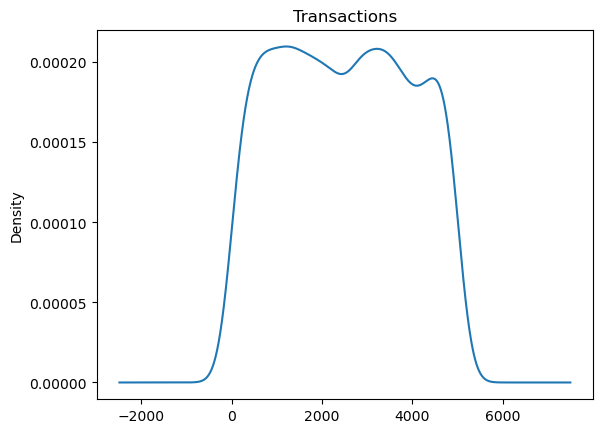

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Transaction_Data_new.csv')

df['Transaction_Amount'].plot(kind='kde',
                                 title='Transactions')

In [204]:
import pandas as pd
df = pd.read_csv('Transaction_Data_new.csv')
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,target_income_group
0,1,393,2023-01-01 00:00:00,3472.0,Purchase,High
1,3,916,2023-01-01 02:00:00,10.0,Purchase,Low
2,4,109,2023-01-01 03:00:00,72.0,Investment,Low
3,5,889,2023-01-01 04:00:00,1793.0,Investment,Medium
4,6,348,2023-01-01 05:00:00,3824.0,Loan Payment,High


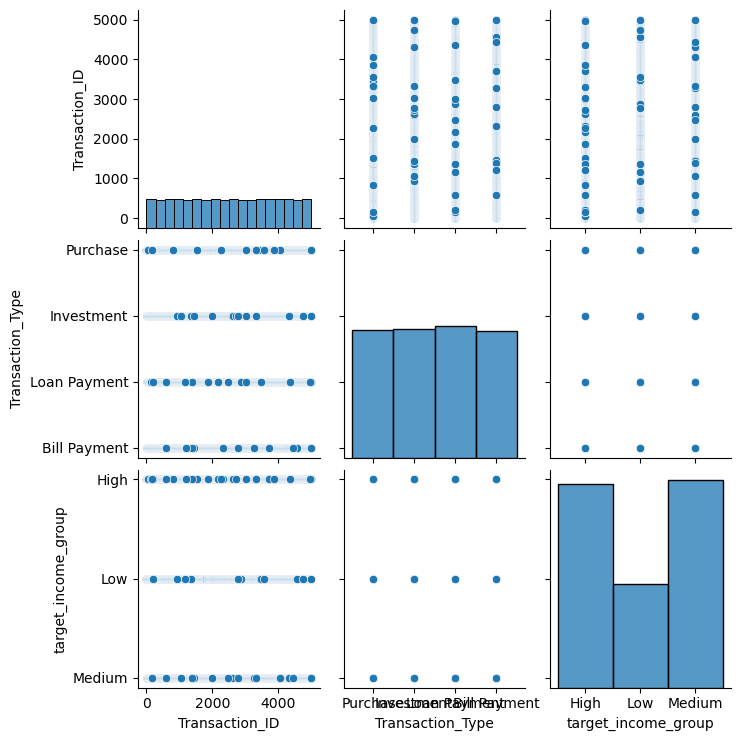

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Transaction_Data_new.csv')
sns.pairplot(df, vars=['Transaction_ID','Transaction_Type','target_income_group'],)
plt.show()

python(90265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


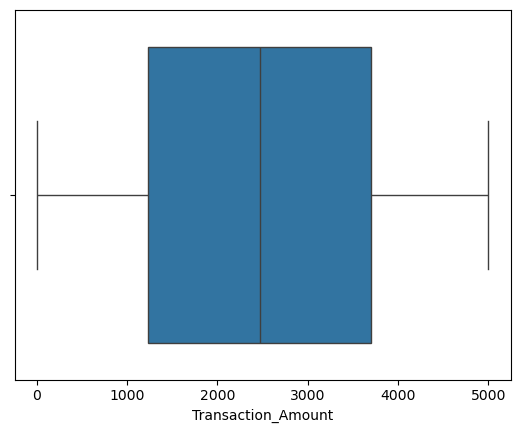

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Transaction_Data_new.csv') 
sns.boxplot(x=df['Transaction_Amount'])
plt.show()

### Customer Feedback

In [10]:
import pandas as pd

#Load the CSV file into a DataFrame
df = pd.read_csv('Customer_Feedback_Data.csv') 
df.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


In [12]:
# Check data types
df.dtypes

Customer_ID                  int64
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object

In [13]:
# Change data type to string
df['Customer_ID'] = df['Customer_ID'].astype('str')

In [14]:
# Check data types
df.dtypes

Customer_ID                 object
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object

In [15]:
# Check null values
df.isna().all()

Customer_ID                False
Satisfaction_Score         False
Feedback_Comments          False
Likelihood_to_Recommend    False
dtype: bool

In [32]:
df.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


In [76]:
import pandas as pd

df = pd.read_csv('Customer_Feedback_Data.csv')
df = pd.DataFrame(data)

# Get summary statistics
print(df.describe())

              0
count  7.000000
mean   5.000000
std    3.109126
min    1.000000
25%    2.500000
50%    5.000000
75%    7.500000
max    9.000000


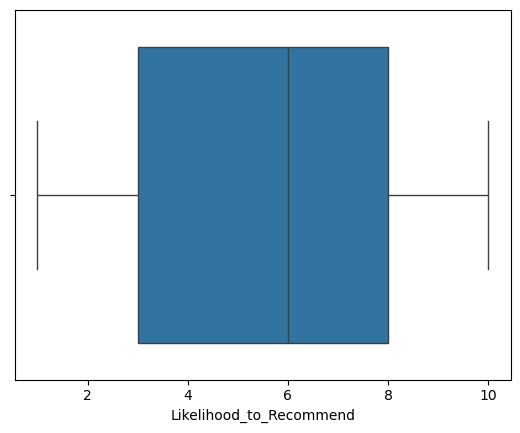

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Customer_Feedback_Data.csv')
# Boxplot
sns.boxplot(x=df['Likelihood_to_Recommend'])
plt.show()

array([[<Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Satisfaction_Score'}>],
       [<Axes: title={'center': 'Likelihood_to_Recommend'}>, <Axes: >]],
      dtype=object)

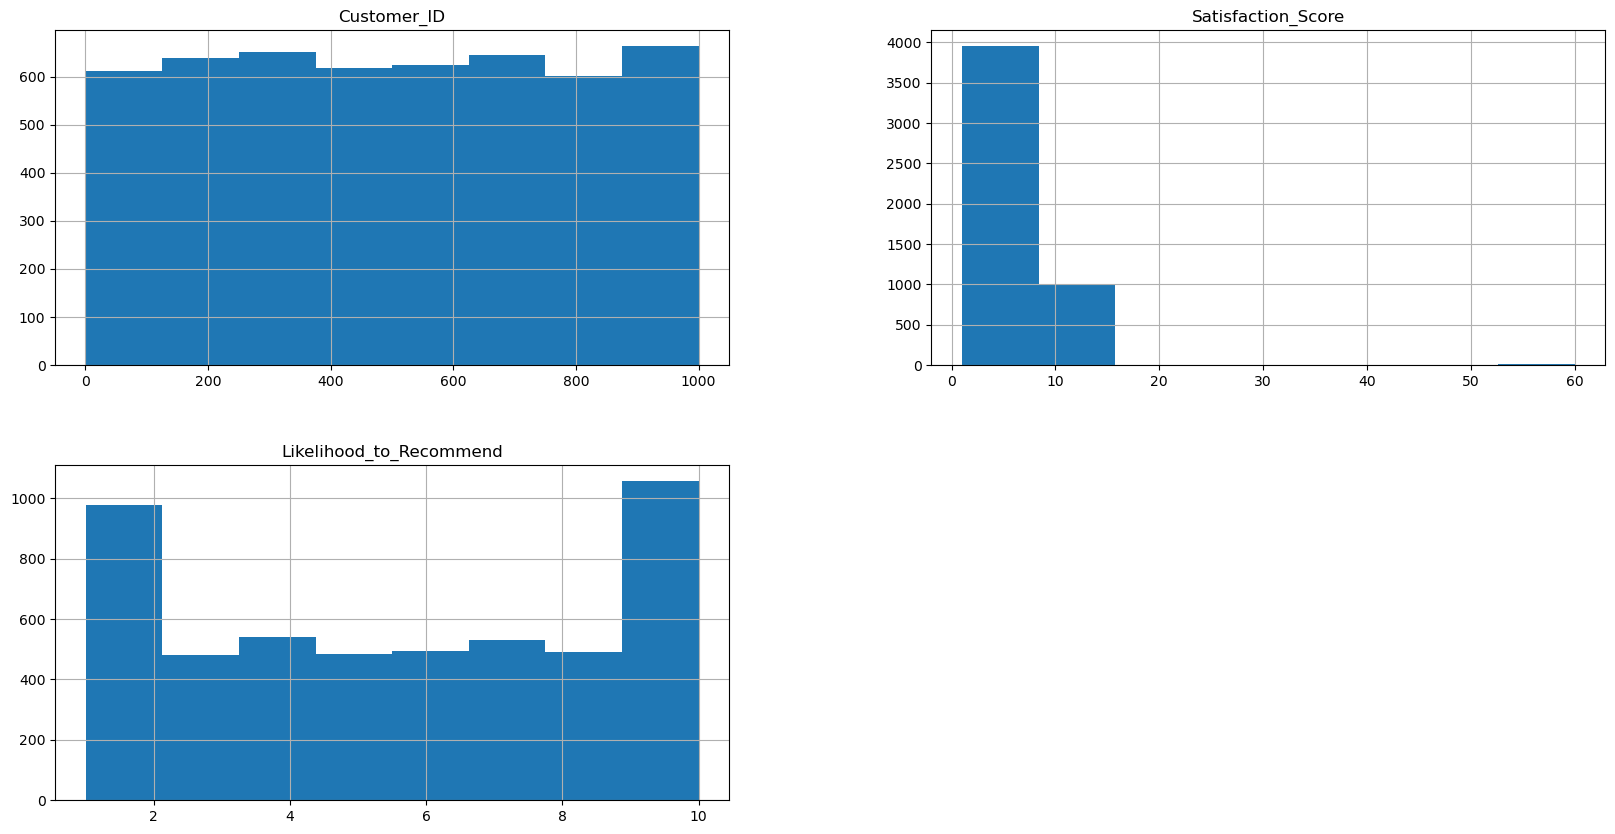

In [43]:
df = pd.read_csv('Customer_Feedback_Data.csv')
df.hist(bins=8, figsize=(20,10))

In [89]:
import pandas as pd
import numpy as np

# Function to calculate Z-scores and detect outliers
def detect_outliers_zscore(df, numerical_columns, threshold=3):

    # Calculate Z-scores for specified numerical columns
    z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
    
    # Add Z-scores to the DataFrame
    for col in numerical_columns:
        df[f'{col}_Z-Score'] = z_scores[col]
    
    # Identify outliers (absolute Z-score > threshold)
    outliers = df[(np.abs(z_scores) > threshold).any(axis=1)]
    
    return outliers

# Load data from a CSV file
file_path = 'Customer_Feedback_Data.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Specify the numerical columns to analyze
numerical_columns = ['Satisfaction_Score', 'Likelihood_to_Recommend']  # Add your column names here

# Detect outliers
outliers = detect_outliers_zscore(df, numerical_columns, threshold=3)

# Print results
print("Original DataFrame:")
print(df.head())  # Display the first few rows of the original data
print("\nOutliers detected using Z-Score method:")
print(outliers)

# Save outliers to a new CSV file (optional)
outliers.to_csv('Outliers_Customer_Feedback_Data.csv', index=False)
print("\nOutliers saved to 'Outliers_Customer_Feedback_Data.csv'.")

Original DataFrame:
   Customer_ID  Satisfaction_Score  Feedback_Comments  \
0            1                10.0     Very satisfied   
1            2                 3.0     Very satisfied   
2            3                10.0     Very satisfied   
3            4                 7.0  Needs improvement   
4            5                 8.0     Unsatisfactory   

   Likelihood_to_Recommend  Satisfaction_Score_Z-Score  \
0                        9                    1.196507   
1                        3                   -0.744427   
2                        1                    1.196507   
3                        4                    0.364678   
4                        7                    0.641954   

   Likelihood_to_Recommend_Z-Score  
0                         1.193602  
1                        -0.895115  
2                        -1.591354  
3                        -0.546996  
4                         0.497363  

Outliers detected using Z-Score method:
      Customer_ID  Satisf

In [142]:
import pandas as pd

df = pd.read_csv('Customer_Feedback_Data.csv')
df.drop('Feedback_Comments', axis=1, inplace=True)

df.to_csv('Customer_Feedback_Data_NEW.csv', index=False)
df.head()

,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
0,1,10.0,9
1,2,3.0,3
2,3,10.0,1
3,4,7.0,4
4,5,8.0,7


In [137]:
import pandas as pd

df = pd.read_csv('Customer_Feedback_Data_NEW.csv')
unique_values = df['Satisfaction_Score'].unique()

print(unique_values)

[10.  3.  7.  8.  9.  6.  1.  2.  5.  4. nan 52. 60. 56. 51. 58. 53. 54.]


In [156]:
import pandas as pd
import numpy as np

df = pd.read_csv('Customer_Feedback_Data_NEW.csv')

values_to_drop = [51, 52, 53, 54, 56, 58, 60]

df = df[~df['Satisfaction_Score'].isin(values_to_drop) & ~df['Satisfaction_Score'].isna()]

df.to_csv('Customer_Feedback_Data_NEW1.csv', index=False)

df.head()

,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
0,1,10.0,9
1,2,3.0,3
2,3,10.0,1
3,4,7.0,4
4,5,8.0,7


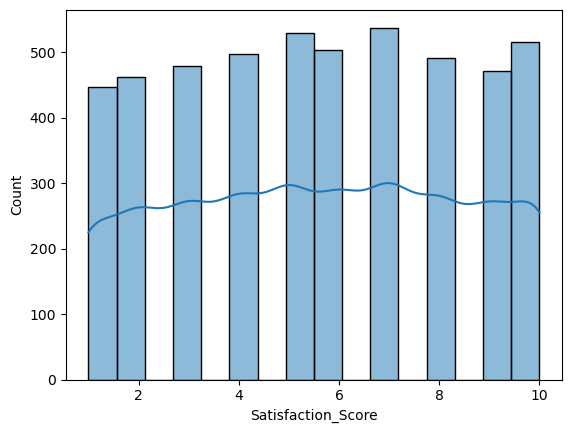

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Customer_Feedback_Data_NEW1.csv')

# Histogram
sns.histplot(df['Satisfaction_Score'], kde=True)
plt.show()

In [158]:
import pandas as pd
df = pd.read_csv('Customer_Feedback_Data_NEW1.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,4939.0,500.543835,288.471941,1.0,251.5,499.0,749.0,1000.0
Satisfaction_Score,4939.0,5.584329,2.831062,1.0,3.0,6.0,8.0,10.0
Likelihood_to_Recommend,4939.0,5.565297,2.875424,1.0,3.0,6.0,8.0,10.0


<Axes: title={'center': 'Satisfaction score'}, ylabel='Density'>

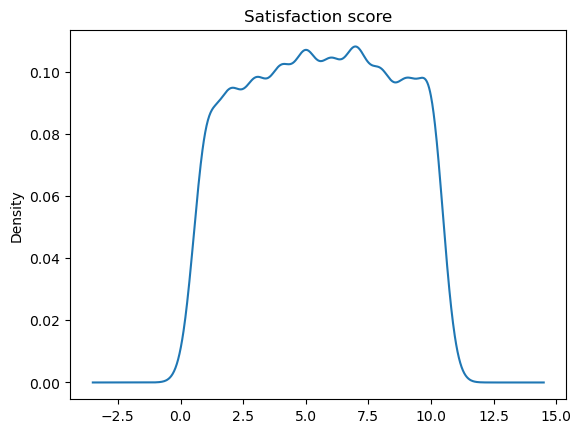

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Customer_Feedback_Data_NEW1.csv')

df['Satisfaction_Score'].plot(kind='kde',
                                 title='Satisfaction score')

In [187]:
import pandas as pd
df = pd.read_csv('Customer_Feedback_Data_NEW1.csv')
df.head()

,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
0,1,10.0,9
1,2,3.0,3
2,3,10.0,1
3,4,7.0,4
4,5,8.0,7


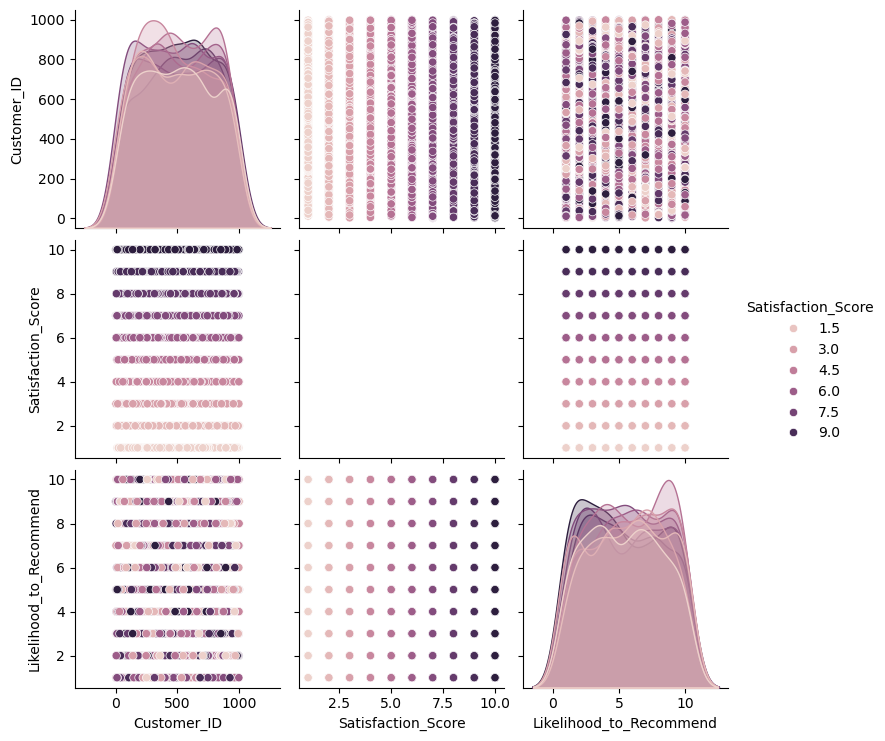

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Customer_Feedback_Data_NEW1.csv')
sns.pairplot(df, vars=['Customer_ID','Satisfaction_Score','Likelihood_to_Recommend'], hue='Satisfaction_Score')
plt.show()

In [ ]:
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
one_hottransform = one_hot.fit_transform(df[['Transaction_Type']])
print(one_hot)

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encoded_data = encoder.fit_transform(df[['Transaction_Type']])
df = pd.concat([df, encoded_data], axis=1)
df.to_csv('Transaction_Data_new_TA.csv', index=False)

In [ ]:
df.head()

In [ ]:
# One-Hot Encoding for Transaction Type
Ttype_encoder = OneHotEncoder(sparse_output=False)
Ttype_encoded = Ttype_encoder.fit_transform(df[['Transaction_Type']])